In [63]:
from strawberryfields.apps import sample
from strawberryfields.apps import data
import numpy as np
import networkx as nx
from strawberryfields.apps import plot

import pandas as pd
import matplotlib.pyplot as plt

In [64]:
n_mean = 1 # mean photon number
n_samples = 612 # number of samples
A = np.array([[0, 1, 1, 0, 0, 1],
              [1, 0, 1, 1, 0, 0],
              [1, 1, 0, 1, 0, 0],
              [0, 1, 1, 0, 1, 0],
              [0, 0, 0, 1, 0, 1],
              [1, 0, 0, 0, 1, 0]]) 

modes = np.shape(A)[0] # number of modes

# g = nx.Graph(A)
# plot.graph(g)

In [65]:
samples = sample.sample(A, n_mean, n_samples, threshold=True)


In [66]:
maximum = 0
for j in range(modes):
    maximum += 2**j
    
measuments = [bin(i)[2:] for i in range(maximum + 1)]


In [54]:
probability = np.zeros([maximum + 1])
for sample in samples:
    n = 0
    t = 0
    for i in sample[-1::-1]:
        n += i * 2**t
        t += 1
    probability[n] += 1

probability /= n_samples


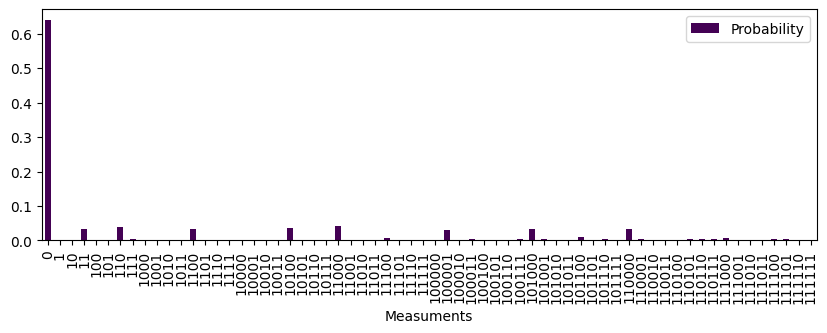

In [55]:
pr_dict = {'Measuments' : measuments,
              'Probability' : probability}
data = pd.DataFrame(pr_dict)

data.plot(kind='bar', x='Measuments', colormap = 'viridis', figsize=(10, 3));

In [56]:
# non_zero_samples = np.array(samples)

non_zero_samples = np.array([0] * modes)

for i in range(len(samples)):

    if samples[i] != [0] * modes:

        non_zero_samples = np.vstack((non_zero_samples, samples[i]))



In [57]:
probability = np.zeros([maximum + 1])
for sample in non_zero_samples:
    n = 0
    t = 0
    for i in sample[-1::-1]:
        n += i * 2**t
        t += 1
    probability[n] += 1

probability /= n_samples


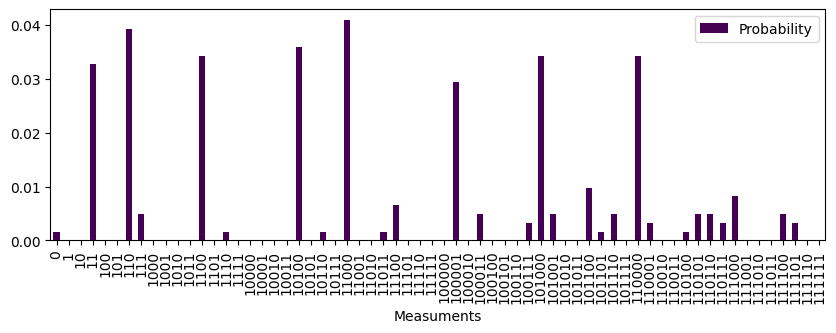

In [58]:
pr_dict = {'Measuments' : measuments,
              'Probability' : probability}
data = pd.DataFrame(pr_dict)

data.plot(kind='bar', x='Measuments', colormap = 'viridis', figsize=(10, 3));